In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [66]:
# 8 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_55/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

# TMM to reticolo

In [67]:
A, B = 'mcwat', 'reti'

In [68]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## abs(difference in transmittance)

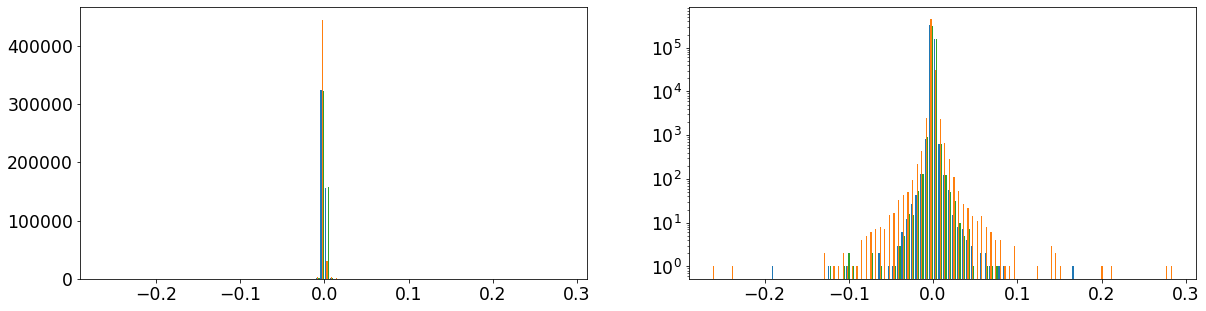

In [69]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [70]:
df[abs(df['gap-1'])>0.01][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
241525,0.075502,0.263434,-0.187932
362868,0.032820,0.157709,-0.124889
8598,0.194691,0.296532,-0.101841
94343,0.160148,0.222406,-0.062258
182526,0.132600,0.193139,-0.060539
...,...,...,...
290407,0.091234,0.029890,0.061344
297665,0.367187,0.299073,0.068114
371226,0.239978,0.159604,0.080373
340653,0.391709,0.308912,0.082797


In [71]:
df[abs(df['gap0'])>0.01][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
433783,0.409047,0.671978,-0.262931
91477,0.321987,0.559847,-0.237859
126418,0.339299,0.467182,-0.127883
35117,0.447913,0.575617,-0.127704
2262,0.291351,0.410486,-0.119135
...,...,...,...
84244,0.606643,0.453331,0.153312
47133,0.386221,0.185373,0.200848
182526,0.266695,0.056015,0.210680
365886,0.524767,0.247758,0.277008


In [72]:
df[abs(df['gap+1'])>0.01][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
61715,0.127966,0.252517,-0.124551
362868,0.117850,0.223635,-0.105785
337372,0.118047,0.221387,-0.103340
241525,0.279980,0.382212,-0.102233
340653,0.219399,0.317528,-0.098129
...,...,...,...
438910,0.173615,0.130012,0.043604
447745,0.493311,0.448048,0.045263
299633,0.431886,0.367173,0.064713
36752,0.656827,0.585366,0.071461


결과 값 차이.

대충 평균 0에서 가우시안 분포.
말 그대로 결과값 사이의 차이.

## Normalized abs(difference in transmittance) 

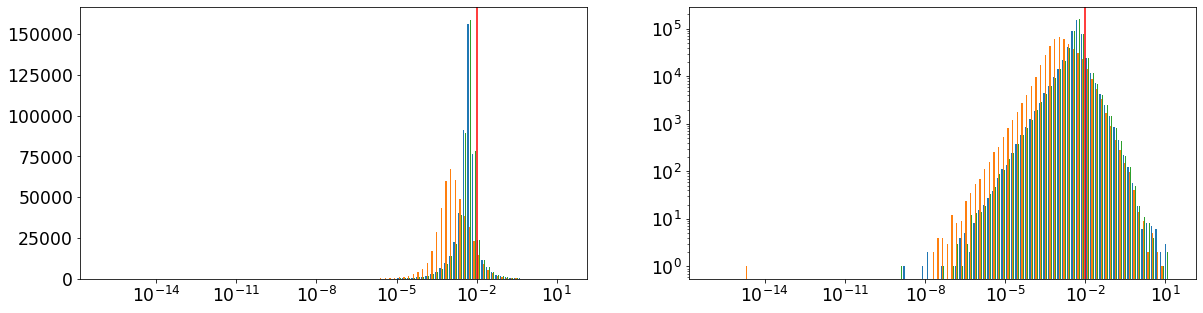

In [73]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(0.01, c='r')
axes[1].axvline(0.01, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [74]:
df[abs(df['gap-1']/df[f'{A}-1'])>0.01][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
241525,0.075502,0.263434,-0.187932
362868,0.032820,0.157709,-0.124889
8598,0.194691,0.296532,-0.101841
94343,0.160148,0.222406,-0.062258
182526,0.132600,0.193139,-0.060539
...,...,...,...
290407,0.091234,0.029890,0.061344
297665,0.367187,0.299073,0.068114
371226,0.239978,0.159604,0.080373
340653,0.391709,0.308912,0.082797


In [75]:
df[abs(df['gap0']/df[f'{A}0'])>0.01][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
433783,0.409047,0.671978,-0.262931
91477,0.321987,0.559847,-0.237859
126418,0.339299,0.467182,-0.127883
35117,0.447913,0.575617,-0.127704
2262,0.291351,0.410486,-0.119135
...,...,...,...
84244,0.606643,0.453331,0.153312
47133,0.386221,0.185373,0.200848
182526,0.266695,0.056015,0.210680
365886,0.524767,0.247758,0.277008


In [76]:
df[abs(df['gap+1']/df[f'{A}+1'])>0.01][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
61715,0.127966,0.252517,-0.124551
362868,0.117850,0.223635,-0.105785
337372,0.118047,0.221387,-0.103340
241525,0.279980,0.382212,-0.102233
340653,0.219399,0.317528,-0.098129
...,...,...,...
438910,0.173615,0.130012,0.043604
447745,0.493311,0.448048,0.045263
299633,0.431886,0.367173,0.064713
36752,0.656827,0.585366,0.071461


# benchmark - simulation time

## run time by time.time()

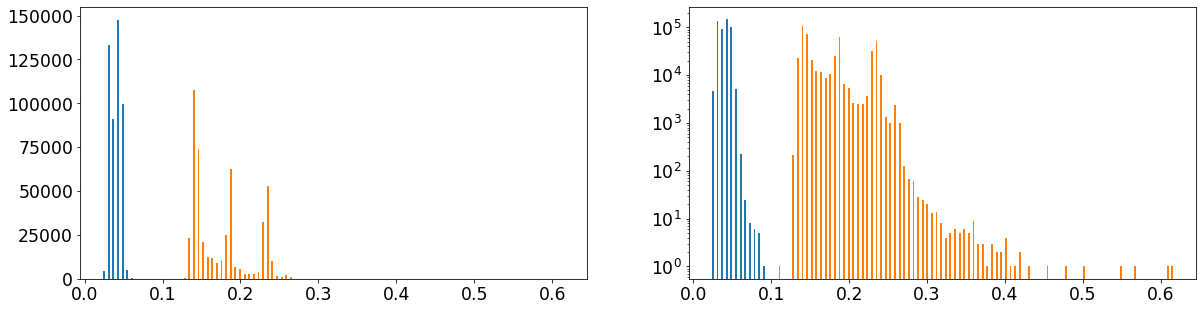

In [77]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent with TMM, Oragne is meent with reticolo

## reticolo time / meent time

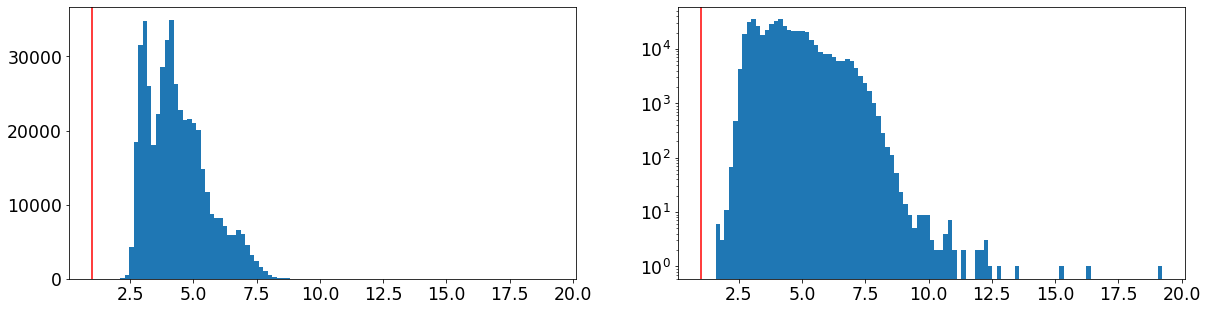

In [78]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [79]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,481647.0,4.362871,1.192919,1.575415,3.386782,4.164775,5.081397,19.231572


meent-TMM is faster 4.2 times than reticolo.

right side of red line: TMM is faster


## time.process_time()

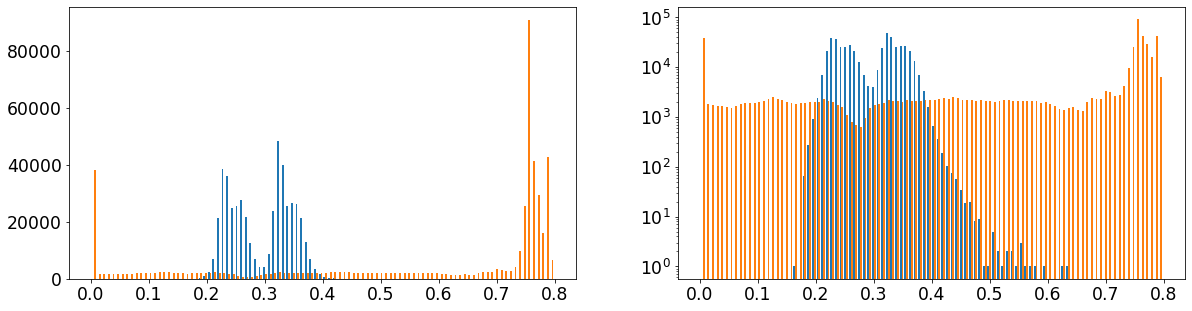

In [80]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

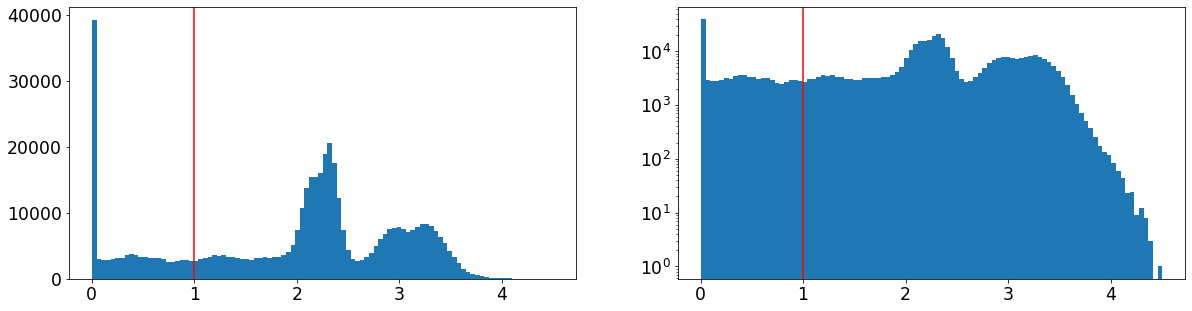

In [81]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [82]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,481647.0,1.981645,1.047852,0.003806,1.236863,2.210744,2.823286,4.501983


Hard to tell...